# IMDB Movie Review Classification using SimpleRNN

Obtain and preprocess the data:

In [ ]:
#!pip install numpy==1.16.2
import numpy as np
print(np.version)

<module 'numpy.version' from '/usr/local/lib/python2.7/dist-packages/numpy/version.pyc'>


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 1s 0us/step
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
('input_train shape:', (25000, 500))
('input_test shape:', (25000, 500))


Let’s train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer.

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 50))
model.add(SimpleRNN(45))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.6049 - acc: 0.6571 - val_loss: 0.4371 - val_acc: 0.8052
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.3656 - acc: 0.8496 - val_loss: 0.4735 - val_acc: 0.7766
Epoch 3/10
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.2633 - acc: 0.8975 - val_loss: 0.7626 - val_acc: 0.7450
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.2077 - acc: 0.9207 - val_loss: 0.4923 - val_acc: 0.7812
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.3043 - acc: 0.8687 - val_loss: 0.4779 - val_acc: 0.7984
Epoch 6/10
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.1345 - acc: 0.9527 - val_loss: 0.4272 - val_acc: 0.8484
Epoch 7/10
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.0706 - acc: 0.9769 - val_loss: 0.4

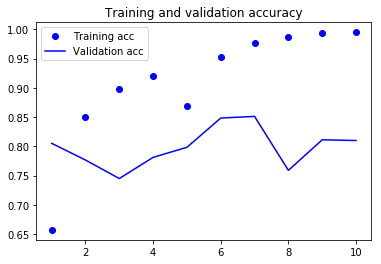

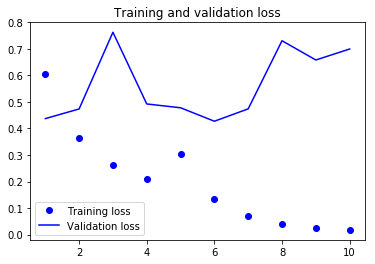

In [ ]:
 import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


As a reminder, in chapter 3, the first naive approach to this dataset got you to a test
accuracy of 88%. Unfortunately, this small recurrent network doesn’t perform well
compared to this baseline (only 85% validation accuracy). Part of the problem is that
your inputs only consider the first 500 words, rather than full sequences—hence, the
RNN has access to less information than the earlier baseline model. The remainder of
the problem is that `SimpleRNN` isn’t good at processing long sequences, such as text.